# Solución Numérica para un Pozo de Potencial Finito en Mecánica Cuántica
Este código resuelve numéricamente el problema cuántico de encontrar los estados energéticos permitidos en un pozo de potencial finito unidimensional.

## Contexto Físico
En mecánica cuántica, una partícula confinada en un pozo de potencial finito de profundidad V₀ y ancho a solo puede existir en estados energéticos discretos. Estos estados ligados se determinan resolviendo la ecuación de Schrödinger con condiciones de frontera específicas.

## Ecuaciones Trascendentes
El problema se reduce a resolver dos ecuaciones trascendentes:

Estados pares (funciones de onda simétricas):
√((z₀/x)² - 1) = tan(x)

Estados impares (funciones de onda antisimétricas):
√((z₀/x)² - 1) = -1/tan(x)

donde:

z₀ = √(2mV₀a²/ℏ²) (parámetro adimensional de profundidad del pozo)

x = ka (relacionado con la energía: E = ℏ²k²/2m)

## Método Numérico
El código utiliza el método de Newton-Raphson para encontrar las raíces de estas ecuaciones, con precauciones especiales para manejar las asíntotas de las funciones trigonométricas.

## Estructura del Código
Definición de funciones: Implementación de las ecuaciones con manejo de asíntotas

Método de Newton: Búsqueda iterativa de raíces para estados pares e impares

Búsqueda sistemática: Exploración en intervalos característicos del problema

Visualización: Gráfico de las funciones y puntos de intersección

## Resultados
El programa encuentra y muestra todas las intersecciones entre las funciones, que corresponden a los niveles de energía permitidos en el pozo cuántico. Cada intersección representa un estado cuántico ligado disponible para la partícula

Found intersections: [1.37333, 2.73949, 4.08863, 5.40172, 6.61597]


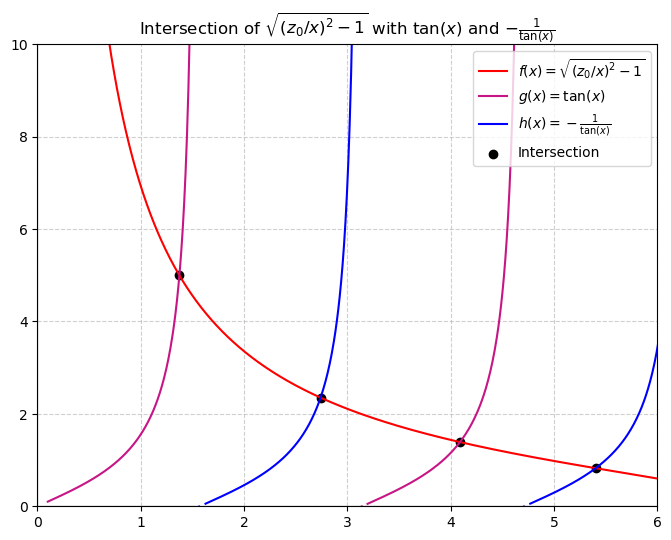

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f(x, z0):
    val = (z0 / x) ** 2 - 1
    return np.sqrt(val) if val >= 0 else np.nan

# Modify the function g(x) to avoid asymptotes
def safe_g(x):
    return np.tan(x) if not np.isclose(np.mod(x, np.pi / 2), 0, atol=0.05) else np.nan

# Modify the function h(x) to avoid asymptotes
def safe_h(x):
    tan_x = np.tan(x)
    return -1 / tan_x if tan_x != 0 and not np.isclose(np.mod(x, np.pi / 2), 0, atol=0.05) else np.nan

def diff(x, z0): # Create the function for Newton's method for the even part
    return f(x, z0) - safe_g(x)

def diff2(x, z0): # Create the function for Newton's method for the odd part
    return f(x, z0) - safe_h(x)

# Define the domain avoiding asymptotes (multiples of pi/2)
def safe_domain(z0, num_points=1000):
    x = np.linspace(0.1, z0, num_points)
    x = x[~np.isclose(np.mod(x, np.pi / 2), 0, atol=0.05)]  # Filter points near asymptotes
    return x

# Newton's method for the even part
def newton_method_par(x0, z0, eps, max_iter=100, step=0.005):
    xold = x0
    for _ in range(max_iter):
        func = diff(xold, z0)
        dfunc = (diff(xold + step, z0) - diff(xold - step, z0)) / (2 * step)
        if dfunc == 0:
            return None
        xnew = xold - func / dfunc
        if abs(xnew - xold) < eps:
            return xnew
        xold = xnew
    return None

# Newton's method for the odd part
def newton_method_impar(x0, z0, eps, max_iter=100, step=0.005):
    xold = x0
    for _ in range(max_iter):
        func = diff2(xold, z0)
        dfunc = (diff2(xold + step, z0) - diff2(xold - step, z0)) / (2 * step)
        if dfunc == 0:
            return None
        xnew = xold - func / dfunc
        if abs(xnew - xold) < eps:
            return xnew
        xold = xnew
    return None

# Function to find intersections between the two equations
def find_roots(z0, eps):
    intersections = []
    interval_size = np.pi / 2
    max_intervals = int(np.floor(z0 / interval_size))

    # Search for intersections for the even part
    for i in range(max_intervals): 
        a = i * np.pi
        b = a + np.pi / 2
        if b > z0:
            b = z0
            
        vals_inside_par = np.linspace(a + 0.01, b - 0.01, 100)
        for x0 in vals_inside_par:
            root = newton_method_par(x0, z0, eps)
            if root is not None and a < root < b:
                if not any(np.isclose(root, r, atol=1e-3) for r in intersections):
                    intersections.append(root)
                    
    # Search for intersections for the odd part
    for i in range(max_intervals): 
        c = i * np.pi
        d = c + np.pi / 2 + np.pi
        if d > z0:
            d = z0                  

        vals_inside_impar = np.linspace(c + 0.01, d - 0.01, 100)
        for x0 in vals_inside_impar:
            root = newton_method_impar(x0, z0, eps)
            if root is not None and c < root < d:
                if not any(np.isclose(root, r, atol=1e-3) for r in intersections):
                    intersections.append(root)

    intersections = np.round(intersections, 5)
    return sorted(intersections)

# Set the parameters
z0 = 7
eps = 1e-5
x_val = safe_domain(z0)

intersections = find_roots(z0, eps)
print("Found intersections:", intersections)

x = np.linspace(0.1, z0, 1000)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, [f(xi, z0) for xi in x], label=r'$f(x) = \sqrt{(z_0/x)^2 - 1}$', color='red')
plt.plot(x, [safe_g(xi) for xi in x], label=r'$g(x) = \tan(x)$', color='mediumvioletred')
plt.plot(x, [safe_h(xi) for xi in x], label=r'$h(x) = -\frac{1}{\tan(x)}$', color='blue')

# Mark the found intersections
for idx, xi in enumerate(intersections):
    plt.scatter(xi, f(xi, z0), color='black', label="Intersection" if idx == 0 else "")

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title(r"Intersection of $\sqrt{(z_0/x)^2 - 1}$ with $\tan(x)$ and $-\frac{1}{\tan(x)}$")
plt.show()